In [124]:
import numpy as np
import matplotlib.pyplot as plt

## Plot by learning rate and number of agents

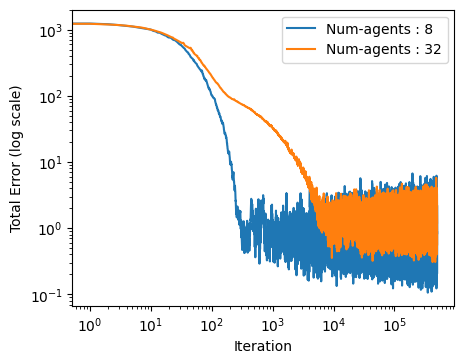

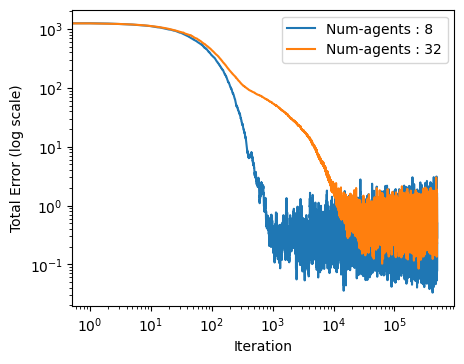

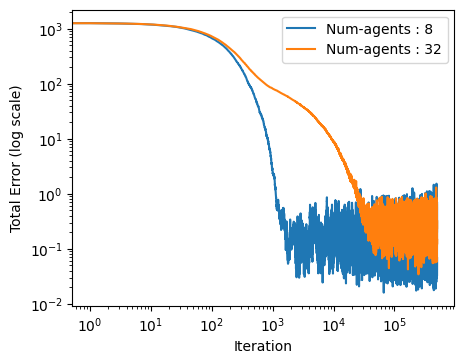

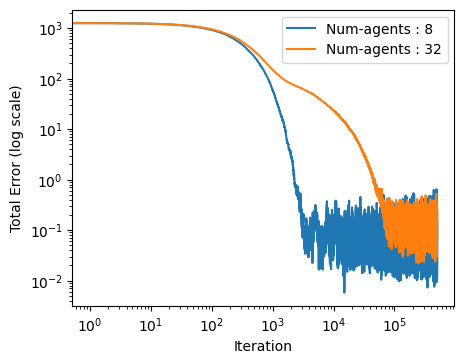

All figures saved!


In [139]:
exp_id = "42fbd"
num_agents = [8,32]
lrs = [1/(2**3),1/(2**4),1/(2**5),1/(2**6)] #, 1/(2**4),1/(2**5),1/(2**6)]
graph_type = "ring"

for i, lr in enumerate(lrs):
    plt.figure(figsize=(5, 4))
    for idx, num_agent in enumerate(num_agents):
        res_mean = np.load(f'results/{exp_id}/{num_agent}/{graph_type}/{lr}/total_error_mean.npy')
        res_std = np.load(f'results/{exp_id}/{num_agent}/{graph_type}/{lr}/total_error_std.npy')

        x = np.arange(len(res_mean))
        
        plt.plot(res_mean, label=f'Num-agents : {num_agent}')
        plt.fill_between(x, res_mean - res_std, res_mean + res_std, alpha=0.3)

    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("Total Error (log scale)")
    
    plt.legend()
    plt.tight_layout(pad=2.0)
    plt.savefig(f"figures/total_error_plot_{graph_type}_lr{lr}.png", dpi=300, bbox_inches='tight')
     # Close the figure to avoid memory issues
plt.show()
plt.close()
print("All figures saved!")

## Plot by agents

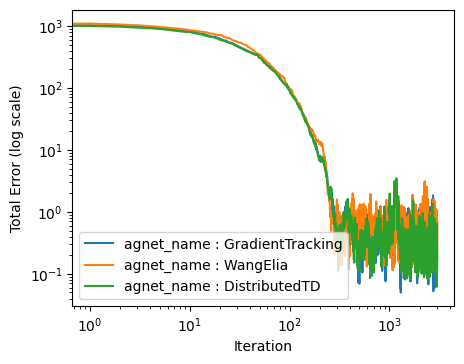

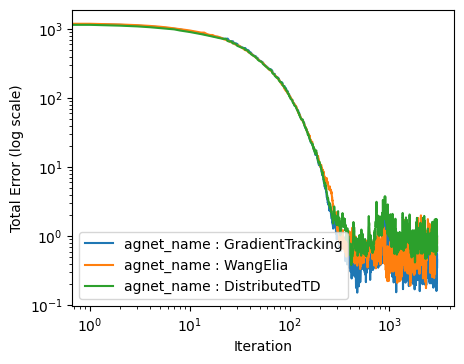

All figures saved!


In [188]:
exp_id = "5dbbb"
num_agents = [8,32]
agent_names =["GradientTracking","WangElia","DistributedTD"] #, 1/(2**4),1/(2**5),1/(2**6)]
graph_type = "ring"
lr = 0.125
mixing_matrix_method = 'sinkhorn'

for i, num_agent in enumerate(num_agents):
    plt.figure(figsize=(5, 4))
    for idx, agent_name in enumerate(agent_names):
        save_dir = f'results/{exp_id}/{num_agent}/{graph_type}/{agent_name}/{lr}'
        if agent_name in ['GradientTracking','DistributedTD']:
            save_dir =f'{save_dir}/{mixing_matrix_method}'
        res_mean = np.load(f'{save_dir}/primal_error_mean.npy')
        res_std = np.load(f'{save_dir}/primal_error_std.npy')

        x = np.arange(len(res_mean))
        
        plt.plot(res_mean, label=f'agnet_name : {agent_name}')
        plt.fill_between(x, res_mean - res_std, res_mean + res_std, alpha=0.3)

    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("Total Error (log scale)")
    
    plt.legend()
    plt.tight_layout(pad=2.0)
    #plt.savefig(f"figures/total_error_plot_{graph_type}_lr{lr}.png", dpi=300, bbox_inches='tight')
     # Close the figure to avoid memory issues
plt.show()
plt.close()
print("All figures saved!")

In [149]:
from utils.graph_utils import least_squares_mixing_matrix,get_graph,sinkhorn_iteration_mixing_matrix

In [153]:
L

array([[ 2, -1,  0,  0,  0,  0,  0, -1],
       [-1,  2, -1,  0,  0,  0,  0,  0],
       [ 0, -1,  2, -1,  0,  0,  0,  0],
       [ 0,  0, -1,  2, -1,  0,  0,  0],
       [ 0,  0,  0, -1,  2, -1,  0,  0],
       [ 0,  0,  0,  0, -1,  2, -1,  0],
       [ 0,  0,  0,  0,  0, -1,  2, -1],
       [-1,  0,  0,  0,  0,  0, -1,  2]])

In [152]:
L = get_graph("ring",8)
Wl = least_squares_mixing_matrix(L)
Ws = sinkhorn_iteration_mixing_matrix(L)

print('least squares',Wl)

print('sinkhorn',Ws)

(8, 8)
least squares [[0.12773962 0.43613019 0.         0.         0.         0.
  0.         0.43613019]
 [0.43613019 0.12773962 0.43613019 0.         0.         0.
  0.         0.        ]
 [0.         0.43613019 0.12773962 0.43613019 0.         0.
  0.         0.        ]
 [0.         0.         0.43613019 0.12773962 0.43613019 0.
  0.         0.        ]
 [0.         0.         0.         0.43613019 0.12773962 0.43613019
  0.         0.        ]
 [0.         0.         0.         0.         0.43613019 0.12773962
  0.43613019 0.        ]
 [0.         0.         0.         0.         0.         0.43613019
  0.12773962 0.43613019]
 [0.43613019 0.         0.         0.         0.         0.
  0.43613019 0.12773962]]
sinkhorn [[0.33333333 0.33333333 0.         0.         0.         0.
  0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.        ]
 [0.      

In [ ]:
print(np.sum(